**Корнилов А.И.**
**3 Вариант.**
                     3.  Вторичный рынок машин
1. Удалите столбцы, ценность которых для оценки стоимости машины низка.
2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.
3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.
4. Заполнить пропущенные данные в строковых полях.
5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.
6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.
7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.
8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.
9. Добавьте в набор данных признак, являющийся суммой двух других признаков.

**1. Удалите столбцы, ценность которых для оценки стоимости машины низка.**

In [5]:
import pandas as pd
%matplotlib inline
autos_df = pd.read_csv('autos.csv', encoding='iso-8859-1')
print(autos_df)

                dateCrawled  \
0       2016-03-24 11:52:17   
1       2016-03-24 10:58:45   
2       2016-03-14 12:52:21   
3       2016-03-17 16:54:04   
4       2016-03-31 17:25:20   
5       2016-04-04 17:36:23   
6       2016-04-01 20:48:51   
7       2016-03-21 18:54:38   
8       2016-04-04 23:42:13   
9       2016-03-17 10:53:50   
10      2016-03-26 19:54:18   
11      2016-04-07 10:06:22   
12      2016-03-15 22:49:09   
13      2016-03-21 21:37:40   
14      2016-03-21 12:57:01   
15      2016-03-11 21:39:15   
16      2016-04-01 12:46:46   
17      2016-03-20 10:25:19   
18      2016-03-23 15:48:05   
19      2016-04-01 22:55:47   
20      2016-04-01 19:56:48   
21      2016-03-27 11:38:00   
22      2016-03-23 14:52:51   
23      2016-03-12 19:43:07   
24      2016-03-13 20:40:49   
25      2016-03-18 21:44:09   
26      2016-03-10 19:38:18   
27      2016-03-07 12:51:23   
28      2016-03-09 11:56:38   
29      2016-03-08 19:55:19   
...                     ...   
371498  

In [6]:
clearAutos = autos_df.drop(['seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns')
print (clearAutos)

                                                     name  price vehicleType  \
0                                              Golf_3_1.6    480         NaN   
1                                    A5_Sportback_2.7_Tdi  18300       coupe   
2                          Jeep_Grand_Cherokee_"Overland"   9800         suv   
3                                      GOLF_4_1_4__3TÜRER   1500  kleinwagen   
4                          Skoda_Fabia_1.4_TDI_PD_Classic   3600  kleinwagen   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650   limousine   
6                             Peugeot_206_CC_110_Platinum   2200      cabrio   
7                            VW_Derby_Bj_80__Scheunenfund      0   limousine   
8                    Ford_C___Max_Titanium_1_0_L_EcoBoost  14500         bus   
9       VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...    999  kleinwagen   
10                                      Mazda_3_1.6_Sport   2000   limousine   
11          Volkswagen_Passat_Variant_2.

**2. Удалите повторяющиеся строки, строки содержащие пропуски в данных. Выведите размер набора данных до и после удаления.**

In [7]:
print ("Начальное количество автомобилей",autos_df.shape[0] + 1) 

Начальное количество автомобилей 371529


In [8]:
dedups = clearAutos.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])
print (dedups)

                                                     name  price vehicleType  \
0                                              Golf_3_1.6    480         NaN   
1                                    A5_Sportback_2.7_Tdi  18300       coupe   
2                          Jeep_Grand_Cherokee_"Overland"   9800         suv   
3                                      GOLF_4_1_4__3TÜRER   1500  kleinwagen   
4                          Skoda_Fabia_1.4_TDI_PD_Classic   3600  kleinwagen   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650   limousine   
6                             Peugeot_206_CC_110_Platinum   2200      cabrio   
7                            VW_Derby_Bj_80__Scheunenfund      0   limousine   
8                    Ford_C___Max_Titanium_1_0_L_EcoBoost  14500         bus   
9       VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...    999  kleinwagen   
10                                      Mazda_3_1.6_Sport   2000   limousine   
11          Volkswagen_Passat_Variant_2.

In [9]:
print ("Количество автомобилей после удаления дубликатов", dedups.shape[0] + 1) 

Количество автомобилей после удаления дубликатов 362771


In [10]:
nanAutos = dedups.dropna()
print (nanAutos)

                                                     name  price vehicleType  \
3                                      GOLF_4_1_4__3TÜRER   1500  kleinwagen   
4                          Skoda_Fabia_1.4_TDI_PD_Classic   3600  kleinwagen   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650   limousine   
6                             Peugeot_206_CC_110_Platinum   2200      cabrio   
7                            VW_Derby_Bj_80__Scheunenfund      0   limousine   
10                                      Mazda_3_1.6_Sport   2000   limousine   
11          Volkswagen_Passat_Variant_2.0_TDI_Comfortline   2799       kombi   
14      Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...  17999         suv   
17                            Renault_Twingo_1.2_16V_Aut.   1750  kleinwagen   
18                       Ford_C_MAX_2.0_TDCi_DPF_Titanium   7550         bus   
19                      Mercedes_Benz_A_160_Classic_Klima   1850         bus   
20                      Volkswagen_Sciro

In [11]:
print ("Количество автомобилей после удаления дубликатов и пропусков в данных", nanAutos.shape[0] + 1) 

Количество автомобилей после удаления дубликатов и пропусков в данных 254922


**3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.**

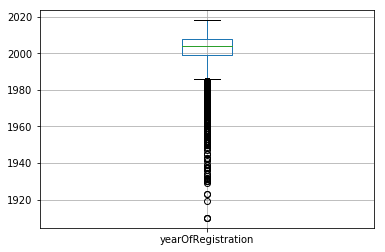

In [12]:
boxplot1 = nanAutos.boxplot(column=['yearOfRegistration'])

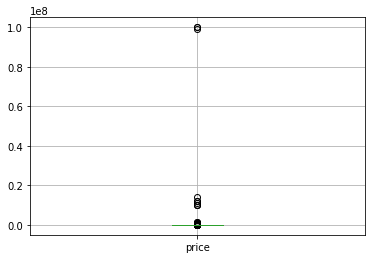

In [13]:
boxplot2 = nanAutos.boxplot(column=['price'])

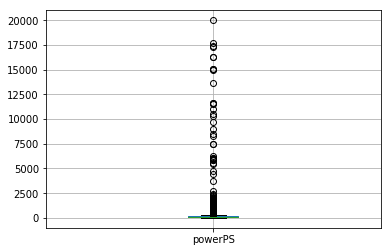

In [14]:
boxplot3 = nanAutos.boxplot(column=['powerPS'])

In [15]:
grCars = nanAutos[
        (nanAutos.yearOfRegistration <= 2016) 
      & (nanAutos.yearOfRegistration >= 1950) 
      & (nanAutos.price >= 100) 
      & (nanAutos.price <= 150000) 
      & (nanAutos.powerPS >= 10) 
      & (nanAutos.powerPS <= 500)]

print (grCars)

                                                     name  price vehicleType  \
3                                      GOLF_4_1_4__3TÜRER   1500  kleinwagen   
4                          Skoda_Fabia_1.4_TDI_PD_Classic   3600  kleinwagen   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650   limousine   
6                             Peugeot_206_CC_110_Platinum   2200      cabrio   
10                                      Mazda_3_1.6_Sport   2000   limousine   
11          Volkswagen_Passat_Variant_2.0_TDI_Comfortline   2799       kombi   
14      Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...  17999         suv   
17                            Renault_Twingo_1.2_16V_Aut.   1750  kleinwagen   
18                       Ford_C_MAX_2.0_TDCi_DPF_Titanium   7550         bus   
19                      Mercedes_Benz_A_160_Classic_Klima   1850         bus   
20                      Volkswagen_Scirocco_1.4_TSI_Sport  10400       coupe   
21      BMW_530i_TÜV_7/17_Scheckheftgepf

In [16]:
print ("Количество автомобилей до ввода пределов", nanAutos.shape[0] + 1) 
print ("Количество автомобилей после ввода пределов", grCars.shape[0] + 1) 

Количество автомобилей до ввода пределов 254922
Количество автомобилей после ввода пределов 241388


**4. Заполнить пропущенные данные в строковых полях.**

In [54]:
dedups2 = dedups
dedups.isnull().sum()

name                       0
price                      0
vehicleType            37380
yearOfRegistration         0
gearbox                19102
powerPS                    0
model                  20260
kilometer                  0
monthOfRegistration        0
fuelType               33047
brand                      0
notRepairedDamage      70197
dtype: int64

In [56]:
dedups['notRepairedDamage'].fillna(value='not-declared', inplace=True)
dedups['fuelType'].fillna(value='not-declared', inplace=True)
dedups['gearbox'].fillna(value='not-declared', inplace=True)
dedups['vehicleType'].fillna(value='not-declared', inplace=True)
dedups['model'].fillna(value='not-declared', inplace=True)

dedups.isnull().sum()

C:\Users\Alexey\Desktop\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

**5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.**

brand
volkswagen       50502
bmw              28364
mercedes_benz    24831
opel             23940
audi             23168
Name: brand, dtype: int64


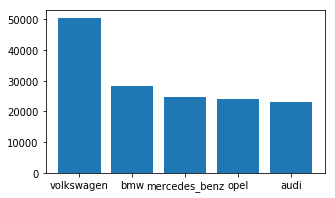

vehicleType
limousine     70970
kleinwagen    53772
kombi         49571
bus           23314
cabrio        17623
Name: vehicleType, dtype: int64


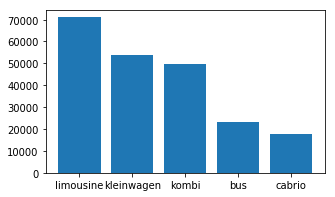

fuelType
benzin    155911
diesel     81122
lpg         3639
cng          419
hybrid       196
Name: fuelType, dtype: int64


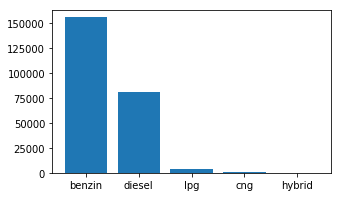

In [61]:
import matplotlib.pyplot as plt
categories = ['brand', 'vehicleType', 'fuelType']
for i, c in enumerate(categories):
    v = grCars[c].unique()
    g = grCars.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))
    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head())
    plt.xticks(r, g.index)
    plt.show()

**6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.**

In [118]:
grCars['nameLen'] = [len(n) for n in grCars['name']]
print(grCars)

                                                     name  price vehicleType  \
3                                      GOLF_4_1_4__3TÜRER   1500  kleinwagen   
4                          Skoda_Fabia_1.4_TDI_PD_Classic   3600  kleinwagen   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650   limousine   
6                             Peugeot_206_CC_110_Platinum   2200      cabrio   
10                                      Mazda_3_1.6_Sport   2000   limousine   
11          Volkswagen_Passat_Variant_2.0_TDI_Comfortline   2799       kombi   
14      Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...  17999         suv   
17                            Renault_Twingo_1.2_16V_Aut.   1750  kleinwagen   
18                       Ford_C_MAX_2.0_TDCi_DPF_Titanium   7550         bus   
19                      Mercedes_Benz_A_160_Classic_Klima   1850         bus   
20                      Volkswagen_Scirocco_1.4_TSI_Sport  10400       coupe   
21      BMW_530i_TÜV_7/17_Scheckheftgepf

C:\Users\Alexey\Desktop\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.**

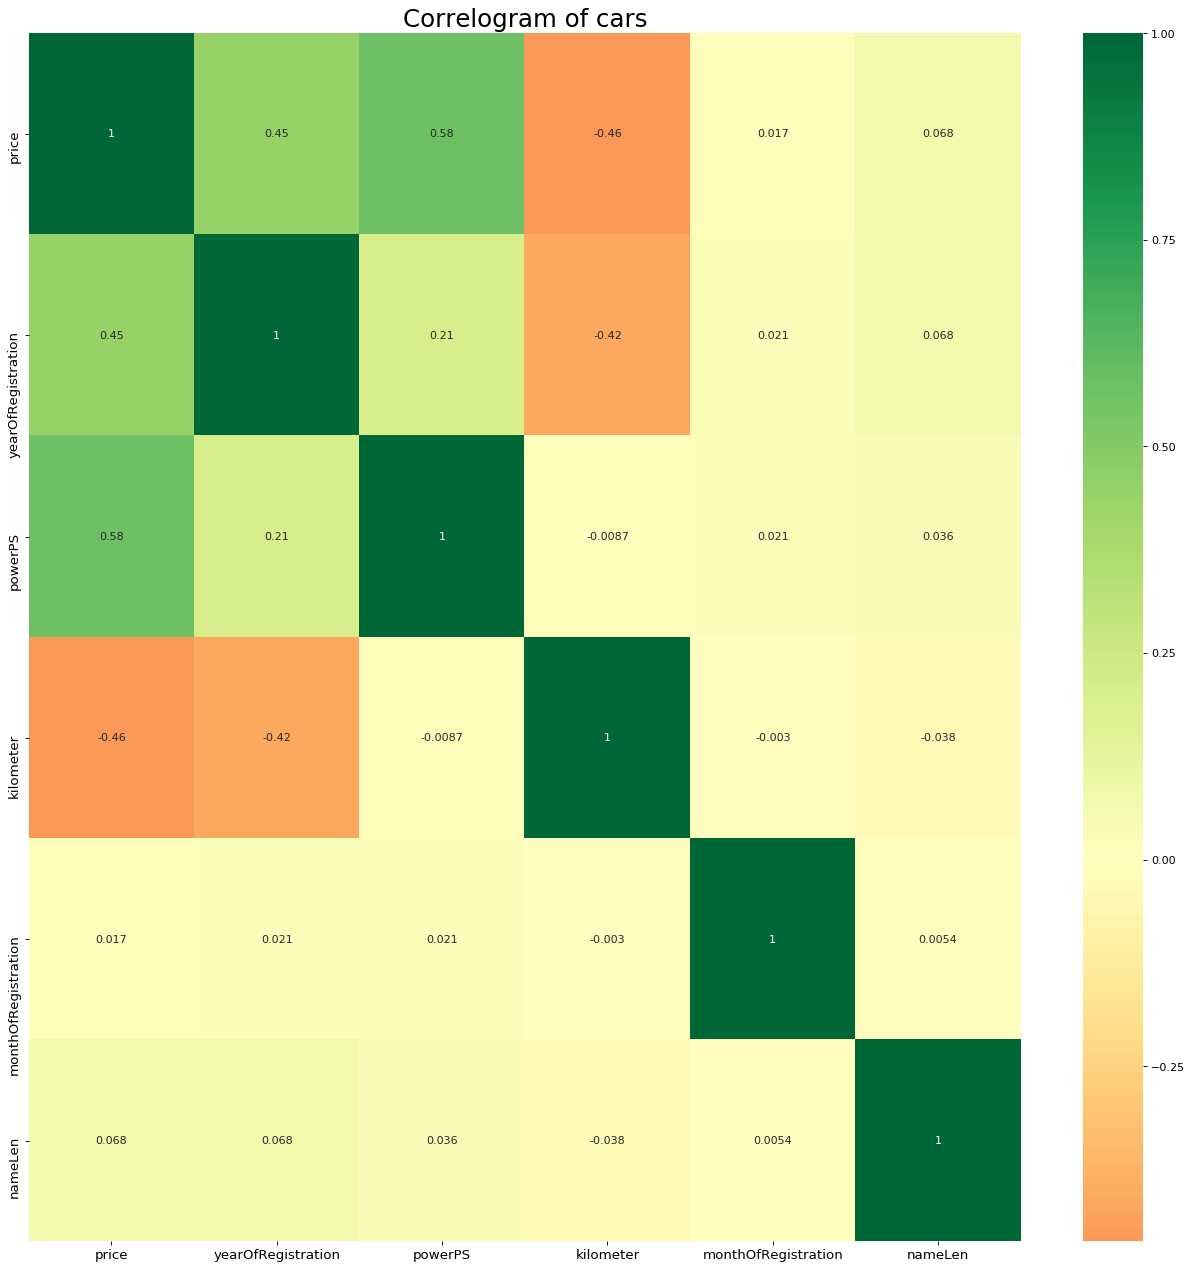

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nameLen
price,1.000000,0.451642,0.575839,-0.461691,0.016608,0.068137
yearOfRegistration,0.451642,1.000000,0.208924,-0.417308,0.021489,0.067551
powerPS,0.575839,0.208924,1.000000,-0.008716,0.021354,0.036464
kilometer,-0.461691,-0.417308,-0.008716,1.000000,-0.002982,-0.037535
monthOfRegistration,0.016608,0.021489,0.021354,-0.002982,1.000000,0.005385
nameLen,0.068137,0.067551,0.036464,-0.037535,0.005385,1.000000


In [92]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(grCars.corr(), xticklabels=grCars.corr().columns, yticklabels=grCars.corr().columns, cmap='RdYlGn', center=0, annot=True)


plt.title('Correlogram of cars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

grCars.corr()

In [93]:
grCars.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                0.575839
kilometer              0.461691
yearOfRegistration     0.451642
nameLen                0.068137
monthOfRegistration    0.016608
Name: price, dtype: float64

**8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.**

Коэффициент корреляции Пирсона:  (-0.010069549164329511, 7.5217036288740257e-07)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=0.036729330390061279, pvalue=7.6721664867759729e-73)
p-value is good


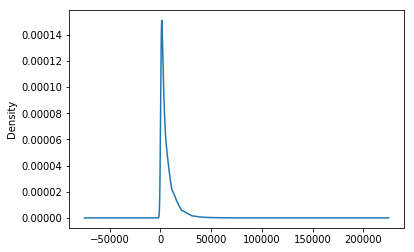

In [36]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
vehicleCoder = pd.Series(label_encoder.fit_transform(grCars['vehicleType']))
pears = pearsonr(grCars['price'],vehicleCoder)
spearm = spearmanr(grCars['price'],vehicleCoder)

print("Коэффициент корреляции Пирсона: ",pears)
print("Коэффициент корреляции Спирмена: ",spearm)

sPrice = pd.Series(grCars['price'])
sPrice.plot.kde()


if (spearm[1]<0.05):
    print("p-value is good")
else:
    print("p-value is not good")

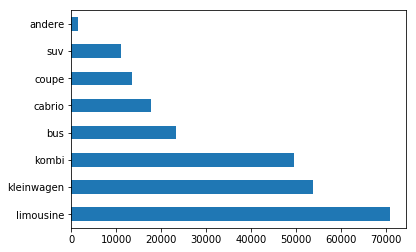

In [38]:
grCars['vehicleType'].value_counts().plot.barh()

**9. Добавьте в набор данных признак, являющийся суммой двух других признаков.**

In [119]:
grCars['gearbox+model'] = [n for n in (grCars['gearbox'] + " " + grCars['model']) ]
print(grCars)

                                                     name  price vehicleType  \
3                                      GOLF_4_1_4__3TÜRER   1500  kleinwagen   
4                          Skoda_Fabia_1.4_TDI_PD_Classic   3600  kleinwagen   
5       BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...    650   limousine   
6                             Peugeot_206_CC_110_Platinum   2200      cabrio   
10                                      Mazda_3_1.6_Sport   2000   limousine   
11          Volkswagen_Passat_Variant_2.0_TDI_Comfortline   2799       kombi   
14      Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...  17999         suv   
17                            Renault_Twingo_1.2_16V_Aut.   1750  kleinwagen   
18                       Ford_C_MAX_2.0_TDCi_DPF_Titanium   7550         bus   
19                      Mercedes_Benz_A_160_Classic_Klima   1850         bus   
20                      Volkswagen_Scirocco_1.4_TSI_Sport  10400       coupe   
21      BMW_530i_TÜV_7/17_Scheckheftgepf

C:\Users\Alexey\Desktop\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
